# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

In [2]:
!pip install rar
!unzip 'dependency_treebank.zip'

ERROR: Could not find a version that satisfies the requirement rar (from versions: none)
ERROR: No matching distribution found for rar
Archive:  dependency_treebank.zip
   creating: dependency_treebank/
  inflating: dependency_treebank/wsj_0093.dp  
  inflating: dependency_treebank/wsj_0065.dp  
  inflating: dependency_treebank/wsj_0039.dp  
  inflating: dependency_treebank/wsj_0182.dp  
  inflating: dependency_treebank/wsj_0186.dp  
  inflating: dependency_treebank/wsj_0041.dp  
  inflating: dependency_treebank/wsj_0018.dp  
  inflating: dependency_treebank/wsj_0105.dp  
  inflating: dependency_treebank/wsj_0149.dp  
  inflating: dependency_treebank/wsj_0194.dp  
  inflating: dependency_treebank/wsj_0055.dp  
  inflating: dependency_treebank/wsj_0187.dp  
  inflating: dependency_treebank/wsj_0143.dp  
  inflating: dependency_treebank/wsj_0052.dp  
  inflating: dependency_treebank/wsj_0064.dp  
  inflating: dependency_treebank/wsj_0179.dp  
  inflating: dependency_treebank/wsj_0195.dp 

IMPORT DATA


In [3]:
import pandas as pd
list_phrase = []
for i in range(1, 200):
  if i<10:
    df = pd.read_table('/content/dependency_treebank/wsj_000{}.dp'.format(i), header = None)
  elif i>=10 and i<100:
    df = pd.read_table('/content/dependency_treebank/wsj_00{}.dp'.format(i), header = None)
  else:
    df = pd.read_table('/content/dependency_treebank/wsj_0{}.dp'.format(i), header = None)
  phrase = ''
  for i in range(0,df.shape[0]):
    phrase = phrase + ' '+ df[0][i]
  list_phrase.append(phrase)
list_phrase_train = list_phrase[0:100]
list_phrase_val = list_phrase[100:150]
list_phrase_test = list_phrase[150::]

STARTING FROM HERE IS A DIOCANE

In [4]:
import zipfile
import os
import urllib.request
url = "https://nlp.stanford.edu/data/glove.6B.zip"

glove_path = os.path.join(os.getcwd(),"Glove")
glove_zip = '/content/Glove/glove.6B.zip'

if not os.path.exists(glove_path):
    os.makedirs(glove_path)

if not os.path.exists(glove_zip):
    urllib.request.urlretrieve(url, glove_zip)
    print("Successful download")

Successful download


In [5]:
!unzip /content/Glove/glove.6B.zip

Archive:  /content/Glove/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [25]:
import numpy as np

glove_file = os.path.join(os.getcwd(),"Glove", "glove.6B.300d.txt")

print ("Loading Glove Model")
with open(glove_file, encoding="utf8" ) as f:
    lines = f.readlines()
vocabulary = {}
for line in lines:
    splits = line.split()
    vocabulary[splits[0]] = np.array([float(val) for val in splits[1:]])
print ("Done.",len(vocabulary.keys())," words loaded!")

Loading Glove Model
Done. 400000  words loaded!


In [28]:
from nltk.tokenize import word_tokenize,sent_tokenize,WhitespaceTokenizer
tokenizer = WhitespaceTokenizer()
def findembedding(word):
    if word in vocabulary.keys():
        embedding = vocabulary[word]
    else:
        embedding = [0]*300
    return embedding

def glovesent(sentence):
    matrix = [findembedding(word) for word in tokenizer.tokenize(str(sentence))]
    matrix = np.array(matrix)
    return np.average(matrix, axis=0)


glove_X_train = np.array([glovesent(sentence) for sentence in list_phrase_train])
glove_X_test = np.array([glovesent(sentence) for sentence in list_phrase_test])



In [ ]:
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!apt-get -qq install -y graphviz && pip install pydot
!pip install cartopy
import cartopy
import pydot
import libarchive
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


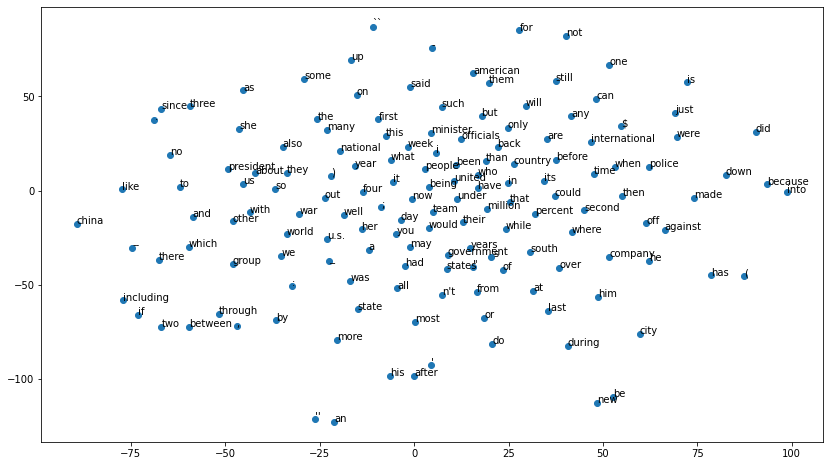

In [29]:
import matplotlib.pyplot as plt

distri = TSNE(n_components=2)
words = list(vocabulary.keys())
vectors = [vocabulary[word] for word in words]
y = distri.fit_transform(vectors[700:850])
plt.figure(figsize=(14,8))
plt.scatter(y[:, 0],y[:,1])
for label,x,y in zip(words,y[:, 0],y[:,1]):
  plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points')
plt.show()